In [34]:
pip install matplotlib requests

Note: you may need to restart the kernel to use updated packages.


Fetched dataset preview:
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

Blockchain created with blocks:
{'index': 1, 'timestamp': 1737653223.2471275, 'data': None, 'previous_hash': '0', 'hash': '18ee85ef16acfbfa61e44d39c3a19b089bca664080319d971512f21ac9151980'}
{'index': 2, 'timestamp': 1737653224.9278193, 'data': {'total_bill': 16.99, 'tip': 1.01, 'sex': 'Female', 'smoker': 'No', 'day': 'Sun', 'time': 'Dinner', 'size': 2}, 'previous_hash': '0', 'hash': '369fc84c50ce4d7c95dd344a837a1f03109aa02e0fd888a1d1a7589f69ffdf93'}
{'index': 3, 'timestamp': 1737653224.9278193, 'data': {'total_bill': 10.34, 'tip': 1.66, 'sex': 'Male', 'smoker': 'No', 'day': 'Sun', 'time': 'Dinner', 'size': 3}, 'previous_hash': '0', 'hash': '1

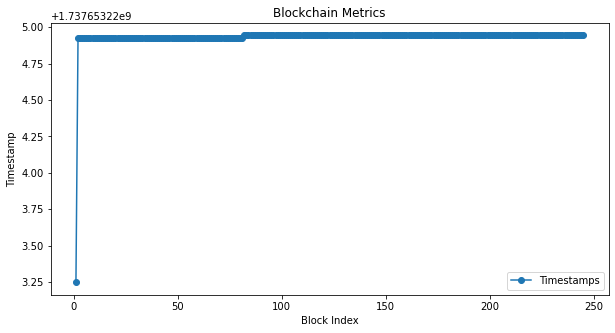

In [35]:
import socket
import json
import hashlib
import time
import matplotlib.pyplot as plt
import pandas as pd
import requests

# Blockchain class
class Blockchain:
    def __init__(self):
        self.chain = []
        self.create_block(previous_hash='0')  # Genesis block

    def create_block(self, data=None, previous_hash='0'):
        block = {
            'index': len(self.chain) + 1,
            'timestamp': time.time(),
            'data': data,
            'previous_hash': previous_hash,
            'hash': None
        }
        block['hash'] = self.hash_block(block)
        self.chain.append(block)
        return block

    @staticmethod
    def hash_block(block):
        encoded_block = json.dumps(block, sort_keys=True).encode()
        return hashlib.sha256(encoded_block).hexdigest()

# Socket programming to simulate blockchain data transfer
def run_server(blockchain):
    server_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    server_socket.bind(('localhost', 65432))
    server_socket.listen(1)
    print("Server started. Waiting for client...")

    conn, addr = server_socket.accept()
    print(f"Connection from {addr} established.")
    for block in blockchain.chain:
        conn.sendall(json.dumps(block).encode() + b'\n')  # Send block data
    conn.close()
    server_socket.close()

def run_client():
    client_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    client_socket.connect(('localhost', 65432))
    print("Connected to the server. Receiving blockchain data:")
    while True:
        data = client_socket.recv(1024)
        if not data:
            break
        print(data.decode())
    client_socket.close()

# Fetch online dataset
def fetch_online_dataset():
    url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"  # Example dataset
    response = requests.get(url)
    with open("tips.csv", "w") as file:
        file.write(response.text)
    return pd.read_csv("tips.csv")

# Plot blockchain metrics
def plot_blockchain_metrics(blockchain):
    indices = [block['index'] for block in blockchain.chain]
    timestamps = [block['timestamp'] for block in blockchain.chain]
    
    plt.figure(figsize=(10, 5))
    plt.plot(indices, timestamps, marker='o', label="Timestamps")
    plt.xlabel('Block Index')
    plt.ylabel('Timestamp')
    plt.title('Blockchain Metrics')
    plt.legend()
    plt.show()

# Main execution
if __name__ == "__main__":
    # Create blockchain and add some blocks
    blockchain = Blockchain()
    dataset = fetch_online_dataset()
    print("Fetched dataset preview:")
    print(dataset.head())

    for _, row in dataset.iterrows():
        blockchain.create_block(data=row.to_dict())

    print("\nBlockchain created with blocks:")
    for block in blockchain.chain:
        print(block)

    # Plot blockchain metrics
    plot_blockchain_metrics(blockchain)

    # Run server and client (in separate IPython cells to simulate interaction)
    # Uncomment the desired function
    # run_server(blockchain)  # Run server
    # run_client()  # Run client
